Карпеченко Д.М., dz17, v.0.2, 07.12.2022

Используем изображения цветов разбитые на 5 классов dandelion', 'daisy','tulip','sunflower','rose (1 класс-1 папка). В папке по 21 шт картинок

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFilter
import os
import cv2
import random
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
test=[r'https://tfhub.dev/google/bit/s-r50x1/1']

In [3]:
model = tf.keras.Sequential([hub.KerasLayer(test[0], trainable=False)])

In [4]:
model.build([None, 50,50,3])

Получим список всех файлов в папках с изображениями

In [5]:
for dirname, _,filenames in os.walk(r'D:\TeachMeSkills\DZ\dz17\flowers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\TeachMeSkills\DZ\dz17\flowers\daisy\100080576_f52e8ee070_n.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\102841525_bd6628ae3c.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\105806915_a9c13e2106_n.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\107592979_aaa9cdfe78_m.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\11642632_1e7627a2cc.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\134409839_71069a95d1_m.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\144076848_57e1d662e3_m.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\144099102_bf63a41e4f_n.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\144603918_b9de002f60_m.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\147068564_32bb4350cc.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\15207766_fc2f1d692c_n.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\21652746_cc379e0eea_m.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\25360380_1a881a5648.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\43474673_7bb4465a86.jpg
D:\TeachMeSkills\DZ\dz17\flowers\daisy\54377391_15648e8d18.jpg
D:\TeachMeSkills\DZ\dz17\flo

Загружаем наши изображения и получаем для каждого векторное представление. В переменной data верторное представление изображения + номер класса

In [155]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 50
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([model.predict(np.expand_dims(resized_arr, axis=0)), class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [156]:
data = get_data(r"D:\TeachMeSkills\DZ\dz17\flowers")

1/1 [==============================] - 0s 130ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_17020\819706320.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [157]:
data

array([[array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 0],
       [array([[1.7325912 , 0.        , 0.        , ..., 0.        , 0.        ,
                0.22979224]], dtype=float32)                                    ,
        0],
       [array([[0.        , 0.11837459, 0.647705  , ..., 0.        , 0.        ,
                0.        ]], dtype=float32)                                    ,
        0],
       [array([[0.31729585, 0.        , 0.        , ..., 0.        , 0.        ,
                0.08354181]], dtype=float32)                                    ,
        0],
       [array([[0.        , 0.29319182, 0.        , ..., 0.        , 0.        ,
                0.08275735]], dtype=float32)                                    ,
        0],
       [array([[1.573014  , 0.01519412, 0.        , ..., 0.        , 0.        ,
                0.        ]], dtype=float32)                                    ,
        0],
       [array([[1.3906143 , 0.        , 0.        , ..., 0

Отобразим классы и количество изображений в нем

C:\Users\HP\anaconda3\envs\My\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

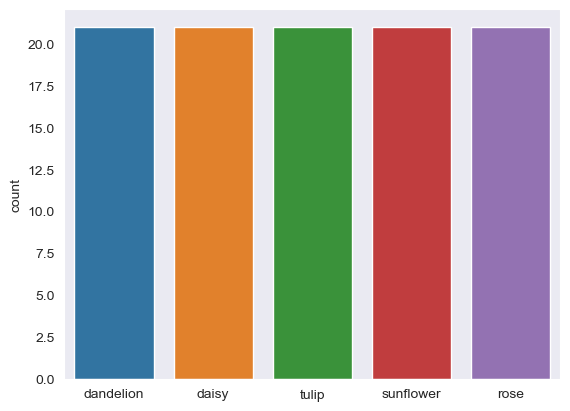

In [158]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

Разобьем переменную data на две части. Одна будет хранить наши вектора изображений (X), вторая - наши лейблы классов (Y)

In [271]:
X=data[:,0]
Y=data[:,1]

In [275]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=object)

После многодневных попыток как то привести размерности моего массива массивов с массивами X к нужному, чтобы модель его съела пришлось влоб отобрать случайные вектора изображений и их метриками таким кровожадным способом. Сил уже не было

In [274]:
Ax=np.concatenate((X[0], X[2],X[16],X[25], X[32],X[40],X[46], X[52],X[61],X[73], X[83],X[91],X[95],X[32], X[104],X[20]), axis=0)

In [279]:
Ay=[]
Ay=(Y[0], Y[2],Y[16],Y[25], Y[32],Y[40],Y[46], Y[52],Y[61],Y[73], Y[83],Y[91],Y[95],Y[32], Y[104],Y[20])

In [280]:
Ay

(0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 1, 4, 0)

In [227]:
A.shape

(16, 2048)

In [256]:
np.array(Ay)

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 1, 4, 0])

In [70]:
X.shape

(105,)

Обучал модель на необработанных данных и на данных прошедших TruncatedSVD

In [351]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X_1=svd.fit_transform(Ax)

In [358]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=4)
y_kmeans=kmeans.fit_predict(Ax)
y2_kmeans=kmeans.fit_predict(X_1)

C:\Users\HP\anaconda3\envs\My\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\envs\My\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [359]:
y_kmeans

array([0, 0, 4, 2, 1, 0, 1, 4, 4, 3, 4, 0, 3, 1, 2, 0])

In [360]:
y2_kmeans

array([4, 3, 1, 2, 0, 4, 2, 1, 1, 1, 1, 4, 4, 0, 3, 3])

Построим матрицу ошибок для необработанных данных (с полным количеством компонент)

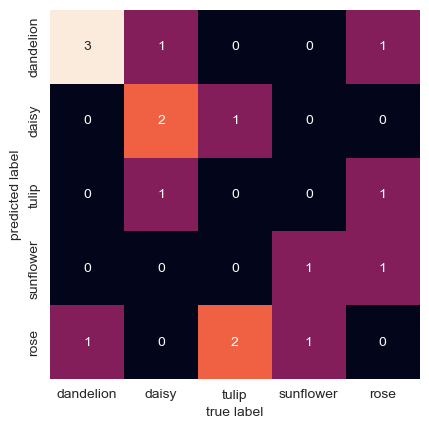

In [361]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Ay, y_kmeans)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['dandelion', 'daisy','tulip','sunflower','rose'],
            yticklabels=['dandelion', 'daisy','tulip','sunflower','rose'])
plt.xlabel('true label')
plt.ylabel('predicted label');

Построим матрицу ошибок для данных TruncatedSVD (n_components=2)

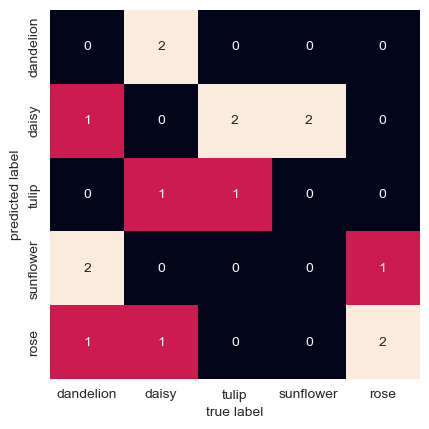

In [362]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Ay, y2_kmeans)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['dandelion', 'daisy','tulip','sunflower','rose'],
            yticklabels=['dandelion', 'daisy','tulip','sunflower','rose'])
plt.xlabel('true label')
plt.ylabel('predicted label');

Посмотрим метрики accuracy_score, precision_score (со всеми компонентами)

In [374]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(Ay, y_kmeans))
print(precision_score(Ay, y_kmeans, average='weighted'))

0.375
0.37916666666666665


Посмотрим метрики accuracy_score, precision_score (n_components=2)

In [377]:
print(accuracy_score(Ay, y2_kmeans))
print(precision_score(Ay, y2_kmeans, average='macro'))

0.1875
0.2


Выводы: До текста не добрался. С изображениями невыносимо работать :) но возможно. На такой маленькой выборке тяжело оценить качества, но что то ищет и классифицирует. Боль 